In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [9]:
df=pd.read_csv("Telecom_Churn.csv")

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7043, 21)

In [12]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df=df.drop("customerID",axis=1)

In [15]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [18]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.shape

(7032, 20)

In [22]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [23]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]

In [25]:
def interactive_outlier_check(df, numerical_values):
    for column in numerical_values:
        fig = px.box(df, y=column, title=f'Boxplot for {column}', width=800, height=500)
        fig.show()
interactive_outlier_check(df, numerical_values)

In [ ]:
def unique_col_values(df):
    for i in df:
        if df[i].dtypes=='object':
            print(f'{i}: {df[i].unique()}')
unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
convert_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in convert_col:
    df[i].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
unique_col_values(df)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [29]:
df1=pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df1.dtypes

gender                                      object
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6873,Female,0,Yes,Yes,68,Yes,Yes,Yes,Yes,Yes,...,1,0,0,0,0,1,1,0,0,0
5231,Male,1,Yes,No,16,Yes,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,1,0
908,Female,0,No,Yes,8,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,1,0,0,0,0,0,1
6780,Male,0,Yes,Yes,13,Yes,No,No,No,No,...,1,0,0,1,0,0,1,0,0,0
3351,Female,0,No,No,16,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1


In [32]:
df1_columns = df1.columns.tolist()
for column in df1_columns:
    print(f"{column} unique values : {df1[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
PaperlessBilling unique values : ['Yes' 'No']
MonthlyCharges unique values : [29.85 56.95 53.85 ... 63.1  44

In [33]:
col_scale=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
df1[col_scale] = ms.fit_transform(df1[col_scale])

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [34]:
x=df1.drop("Churn",axis=1)
y=df1.Churn

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

### ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(units=26,activation='relu',kernel_initializer='random_uniform'))

In [ ]:
model.add(Dense(units=13,activation='relu',kernel_initializer='random_uniform'))

In [ ]:
model.add(Dense(units=13,activation='relu',kernel_initializer='random_uniform'))

In [ ]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='random_uniform'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5495 - accuracy: 0.7332
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7899
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7995
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7982
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8014
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8023
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8032
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8018
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accura

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred=model.predict(x_test)

44/44 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[0.34757048],
       [0.12488283],
       [0.17651036],
       ...,
       [0.56561923],
       [0.2823186 ],
       [0.88007873]], dtype=float32)

In [ ]:
y_prob=y_pred.ravel()

In [ ]:
y_prob

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
y_test

5561    0
5814    0
2645    0
3983    1
6438    1
       ..
2757    0
5702    1
1662    1
2766    0
2918    0
Name: Churn, Length: 1407, dtype: int64

In [ ]:
y_pred=np.where(y_pred>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.8038379530916845

In [ ]:
precision_score(y_test,y_pred)

0.6666666666666666

In [ ]:
recall_score(y_test,y_pred)

0.5040650406504065

In [ ]:
f1_score(y_test,y_pred)

0.574074074074074

In [ ]:
roc_auc_score(y_test,y_pred)

0.7072348324639315

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.67      0.50      0.57       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
report=classification_report(y_test,y_pred,output_dict=True)
class_names = list(report.keys())[:-3]
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

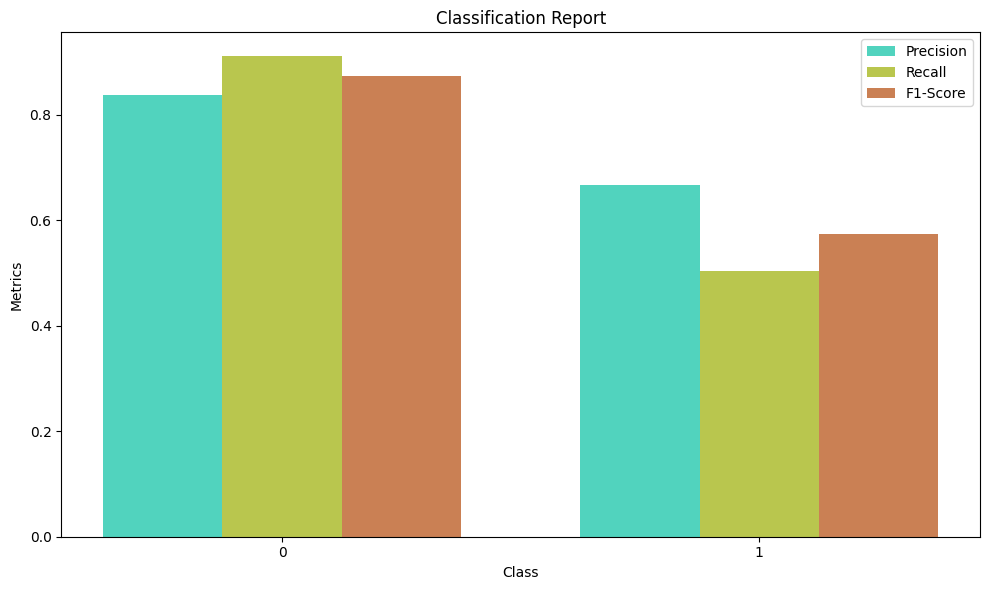

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(class_names))
bar1 = ax.bar(index, precision, bar_width, label='Precision',color='#51D3BE')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall',color='#B9C64E')
bar3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score',color='#CA8054')
ax.set_xlabel('Class')
ax.set_ylabel('Metrics')
ax.set_title('Classification Report')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(class_names)
ax.legend()

plt.tight_layout()
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

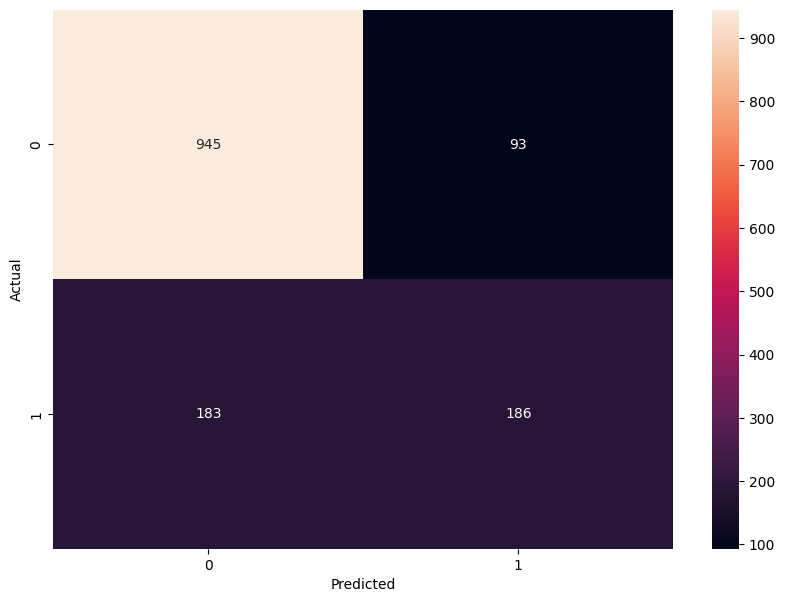

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

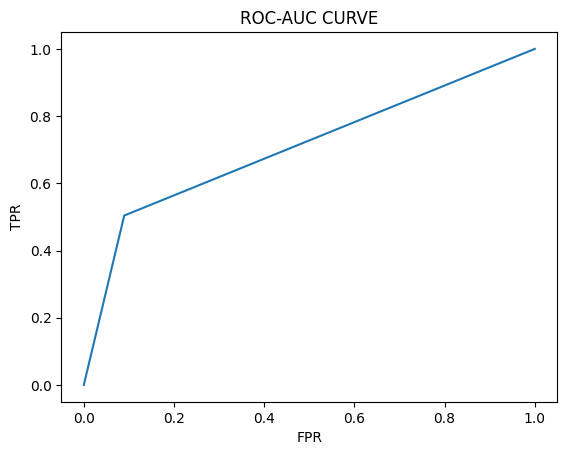

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC CURVE')
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [ ]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=log_model.predict(x_test)

In [ ]:
y_pred1

array([0, 0, 0, ..., 1, 0, 1])

<Axes: ylabel='Feature'>

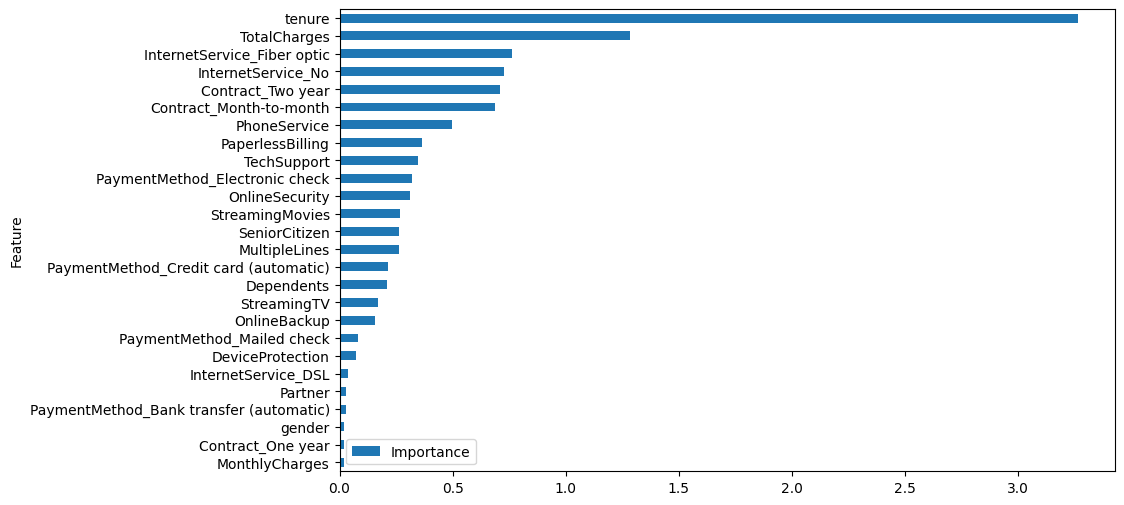

In [ ]:
coefficient=log_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficient)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
accuracy_score(y_pred1,y_test)

0.8038379530916845

In [ ]:
recall_score(y_pred1,y_test)

0.6534653465346535

In [ ]:
precision_score(y_pred1,y_test)

0.5365853658536586

In [ ]:
f1_score(y_pred1,y_test)

0.5892857142857143

In [ ]:
roc_auc_score(y_pred1,y_test)

0.7492870210934138

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.65      0.54      0.59       369

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [ ]:
report1=classification_report(y_test,y_pred1,output_dict=True)
class_names = list(report1.keys())[:-3]
precision = [report1[class_name]['precision'] for class_name in class_names]
recall = [report1[class_name]['recall'] for class_name in class_names]
f1_score = [report1[class_name]['f1-score'] for class_name in class_names]

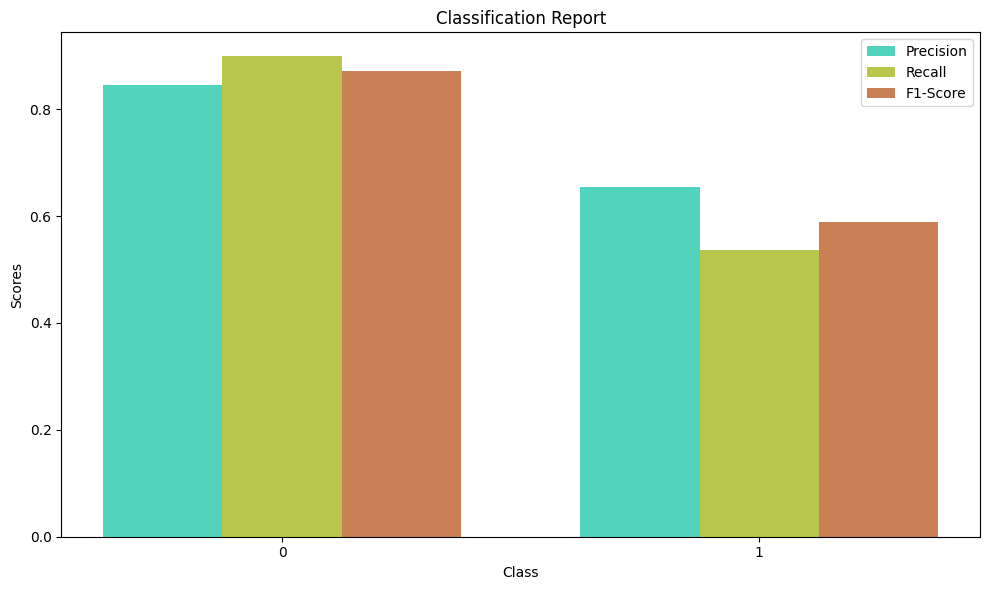

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(class_names))
bar1 = ax.bar(index, precision, bar_width, label='Precision',color='#51D3BE')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall',color='#B9C64E')
bar3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score',color='#CA8054')
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(class_names)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
probability=log_model.predict_proba(x_test)[:,1]
probability

array([0.26846823, 0.13963773, 0.17361368, ..., 0.66877749, 0.15847968,
       0.58567925])

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,probability)

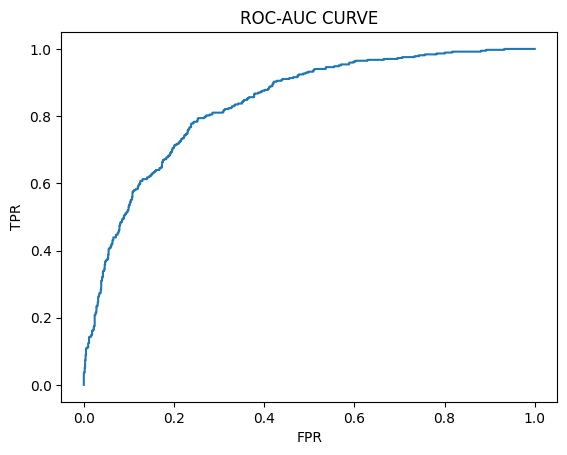

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC CURVE')
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

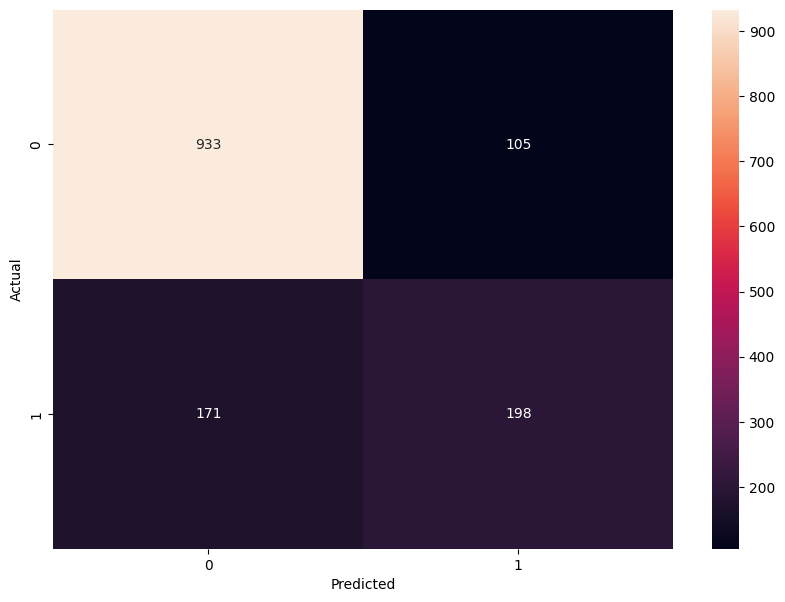

In [ ]:
cm=confusion_matrix(y_test,y_pred1)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [ ]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [ ]:
rfc_cv= GridSearchCV(rfc_model,param_grid=forest_params,cv=10,scoring="accuracy")

In [ ]:
rfc_cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [ ]:
y_pred2=rfc_cv.predict(x_test)

In [ ]:
coefficient1 = rfc_cv.best_estimator_.feature_importances_

<Axes: ylabel='Feature'>

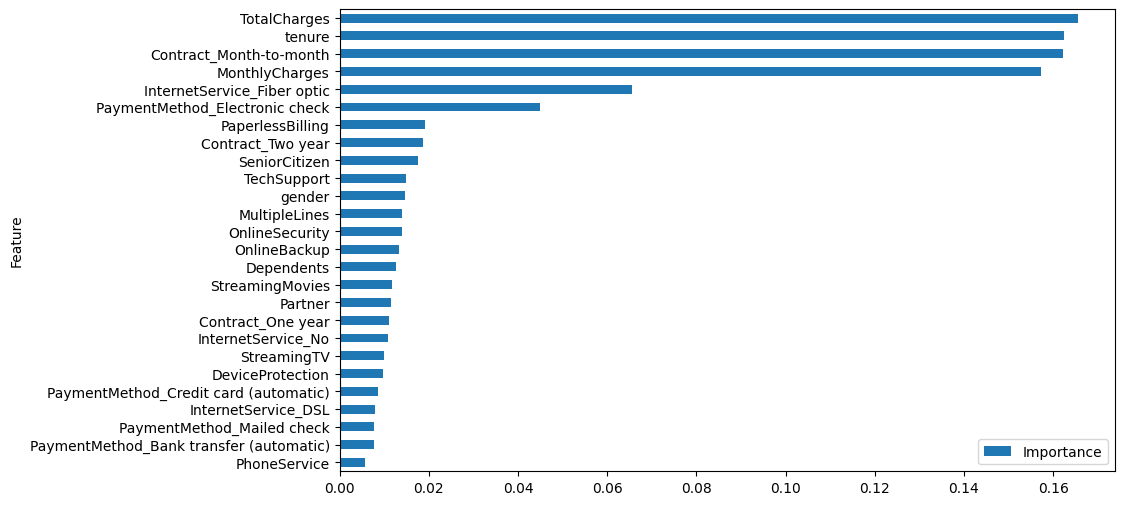

In [ ]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficient1)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.50      0.57       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
report2=classification_report(y_test,y_pred2,output_dict=True)
class_names2 = list(report2.keys())[:-3]
precision2 = [report2[class_name]['precision'] for class_name in class_names2]
recall2 = [report2[class_name]['recall'] for class_name in class_names2]
f1_score2 = [report2[class_name]['f1-score'] for class_name in class_names2]

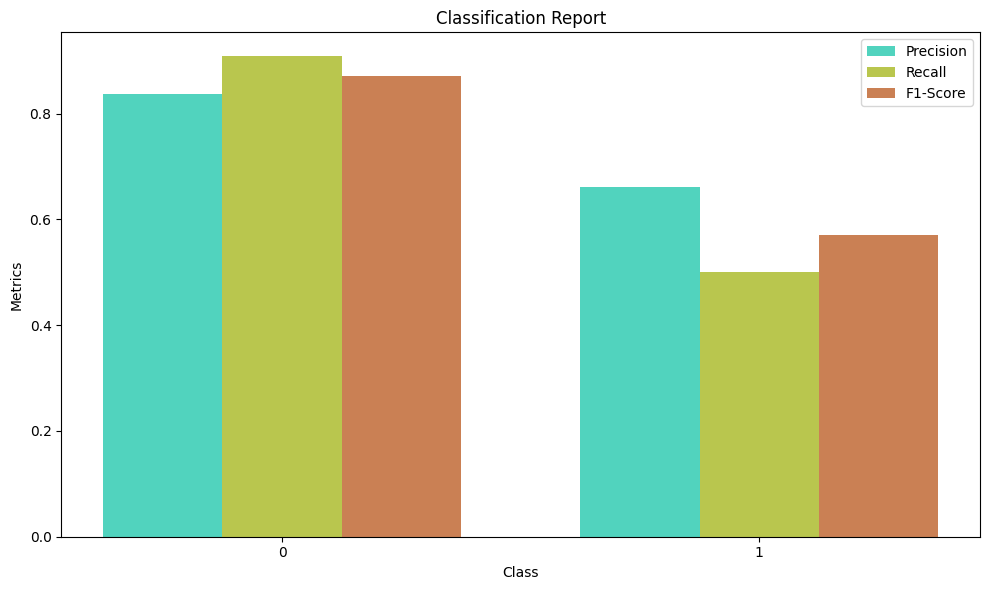

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(class_names2))
bar1 = ax.bar(index, precision2, bar_width, label='Precision',color='#51D3BE')
bar2 = ax.bar(index + bar_width, recall2, bar_width, label='Recall',color='#B9C64E')
bar3 = ax.bar(index + 2 * bar_width, f1_score2, bar_width, label='F1-Score',color='#CA8054')
ax.set_xlabel('Class')
ax.set_ylabel('Metrics')
ax.set_title('Classification Report')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(class_names2)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
accuracy_score(y_pred2,y_test)

0.8017057569296375

In [ ]:
precision_score(y_pred2,y_test)

0.5013550135501355

In [ ]:
recall_score(y_pred2,y_test)

0.6607142857142857

In [ ]:
f1_score(y_pred2,y_test)

0.5701078582434514

In [ ]:
roc_auc_score(y_test,y_pred2)

0.7049164277769945

In [ ]:
rfc_cv.best_params_

{'max_depth': 10, 'max_features': 4}

In [ ]:
probability1=rfc_cv.predict_proba(x_test)[:,1]
probability1

array([0.37901866, 0.11630921, 0.20492483, ..., 0.56223953, 0.19212841,
       0.38764215])

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,probability1)

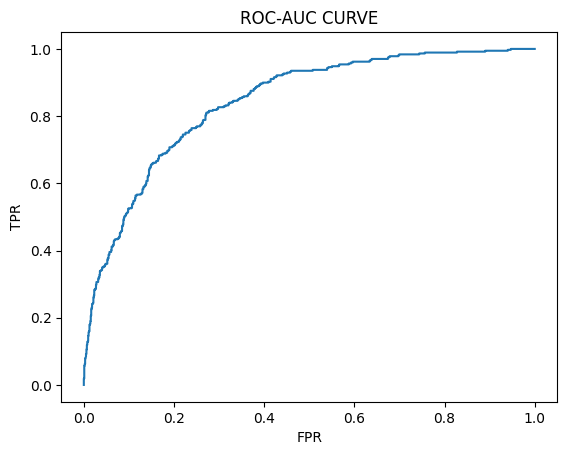

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC CURVE')
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

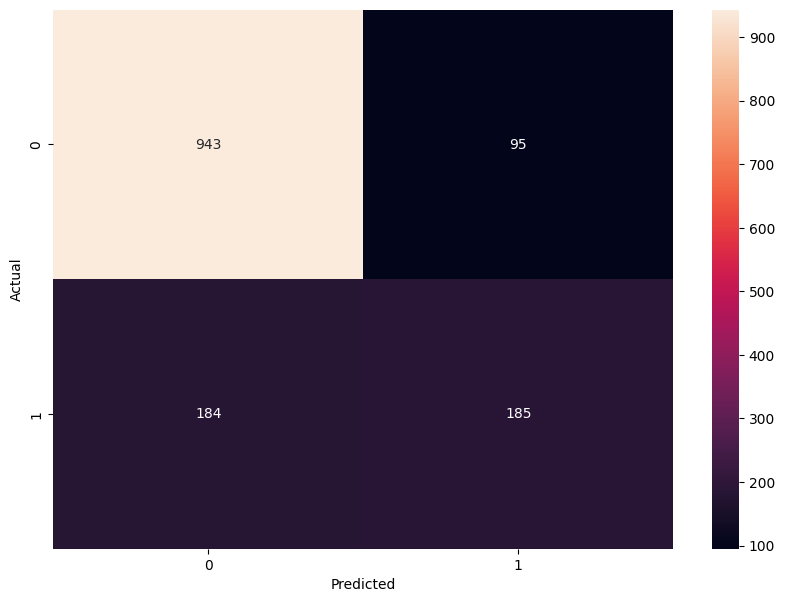

In [ ]:
cm=confusion_matrix(y_test,y_pred2)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Data Visualization

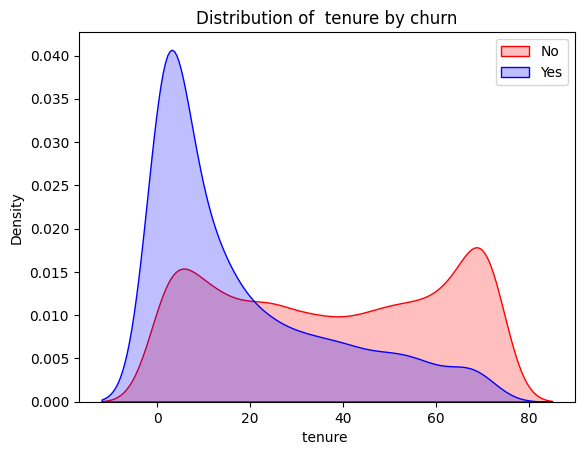

In [ ]:
ax = sns.kdeplot(df.tenure[(df["Churn"]=="No")], fill=True, color="r")
ax = sns.kdeplot(df.tenure[(df["Churn"]=="Yes")], fill=True, color="b")
ax.legend(["No","Yes"],loc='upper right')
ax.set_xlabel('tenure ')
ax.set_title('Distribution of  tenure by churn')
plt.show()

Text(0.5, 1.0, 'Distribution of Tenure by Churn')

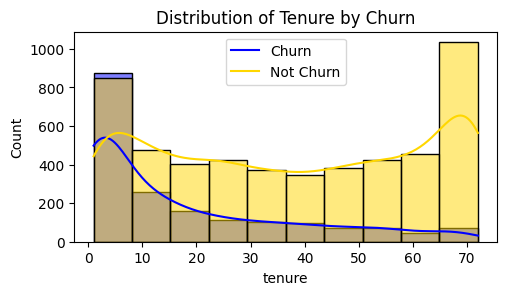

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df[df['Churn'] == 'Yes']['tenure'], bins=10, kde=True, color='blue')
sns.histplot(df[df['Churn'] == 'No']['tenure'], bins=10, kde=True, color='gold')
plt.legend(labels=['Churn', 'Not Churn'])
plt.title('Distribution of Tenure by Churn')

From above, we can say that customers who have high tenure shows strong loyality
New customers have high chances to churn

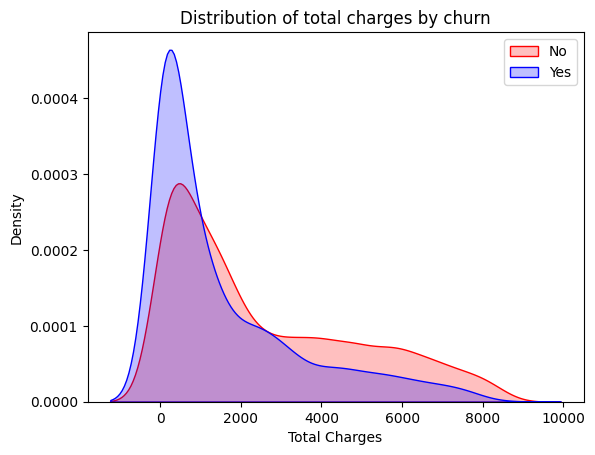

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"]=="No")], fill=True, color="r")
ax = sns.kdeplot(df.TotalCharges[(df["Churn"]=="Yes")], fill=True, color="b")
ax.legend(["No","Yes"],loc='upper right')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')
plt.show()

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

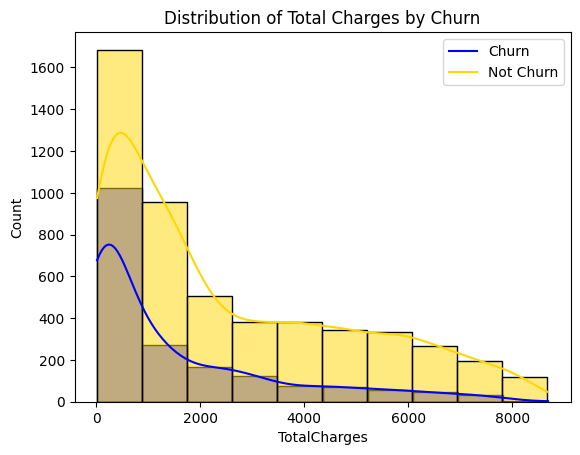

In [ ]:
#plt.subplot(2, 2, 2)
sns.histplot(df[df['Churn'] == 'Yes']['TotalCharges'], bins=10, kde=True, color='blue')
sns.histplot(df[df['Churn'] == 'No']['TotalCharges'], bins=10, kde=True, color='gold')
plt.legend(labels=['Churn', 'Not Churn'])
plt.title('Distribution of Total Charges by Churn')

In [ ]:
px.histogram(df, x='InternetService', color='Churn', title='Internet Service by Churn')

Customers with Fiber Optic InternetService most likely to churn

Text(0.5, 1.0, 'Churn by Contract')

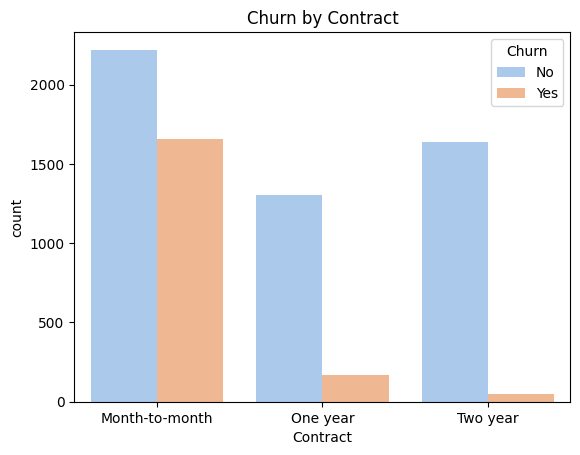

In [ ]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn by Contract')

Customers with Two year contract are less likely to churn

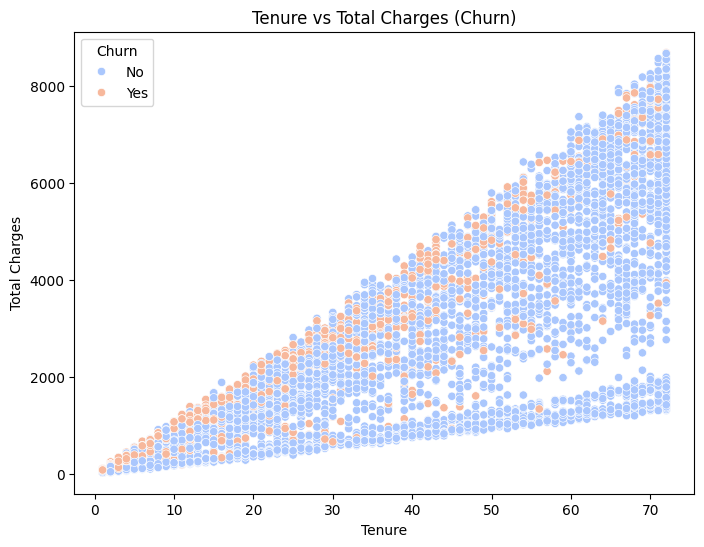

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', palette='coolwarm')
plt.title('Tenure vs Total Charges (Churn)')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.show()

Customers with less tenure and lower total charges are more likely to churn